<a href="https://colab.research.google.com/github/padmashree1995/LGMVIP--DataScience/blob/main/task_1_Iris_Flowers_Classification_ML_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


import libraries
---



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


In [28]:
data= pd.read_csv("/content/sample_data/Iris (3).csv")
data.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

In [29]:
data.shape

(150, 6)

In [30]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [31]:
data.tail

<bound method NDFrame.tail of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

In [32]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [36]:
data.duplicated

<bound method DataFrame.duplicated of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iri

In [45]:
data.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [46]:
data.Species.value_counts

<bound method IndexOpsMixin.value_counts of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>

In [37]:
data.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [38]:
data.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [47]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [48]:
X= data[['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y= data['Species']

In [49]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


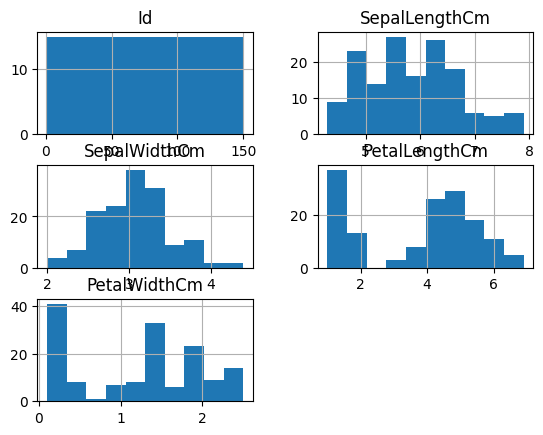

In [50]:
data.hist()
plt.show()

In [51]:
import seaborn as sns
sns.set_style("darkgrid")
# set the custom size for my graphs
sns.set(rc={'figure.figsize':(8.7,6.27)})

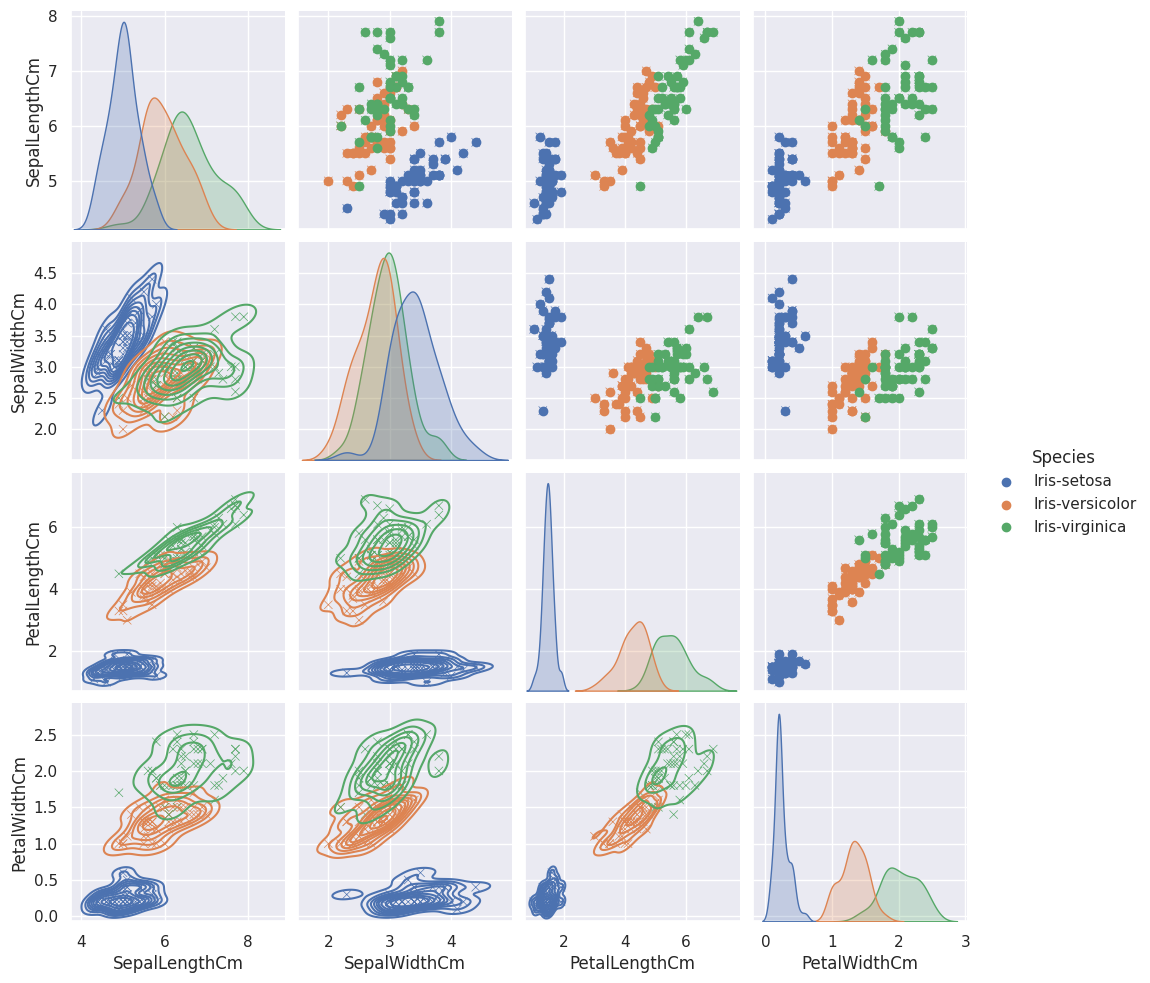

In [52]:
snsdata = data.drop(['Id'], axis=1)
g = sns.pairplot(snsdata, hue='Species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

<ipython-input-54-a005e2704a73>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

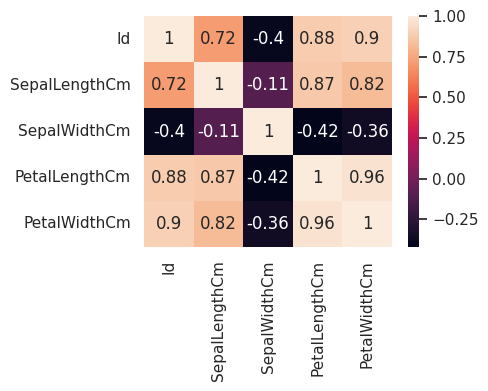

In [54]:
corr = data.corr()
plt.subplots(figsize=(4,3))
sns.heatmap(corr, annot=True)

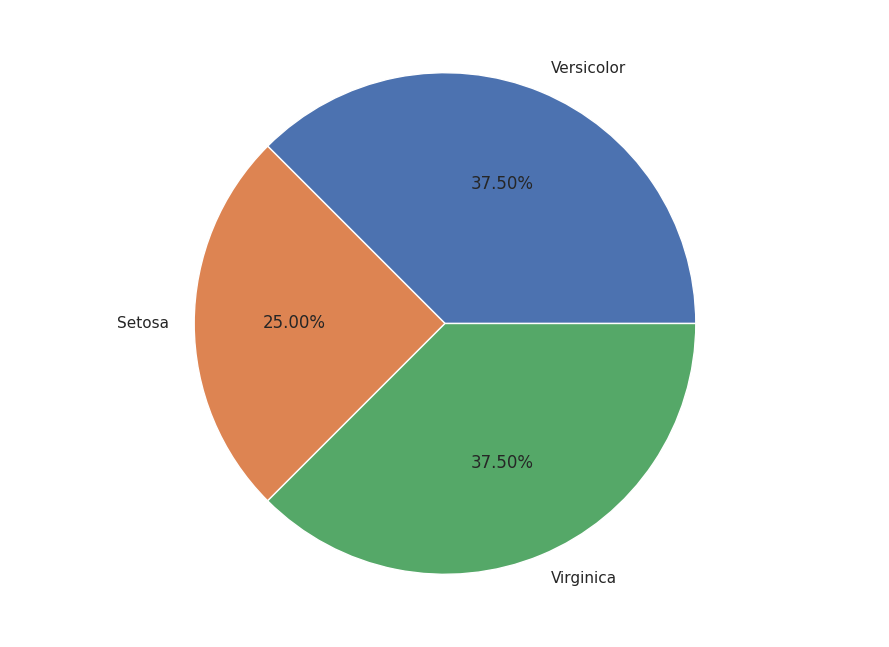

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [30,20,30]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

<Axes: ylabel='Density'>

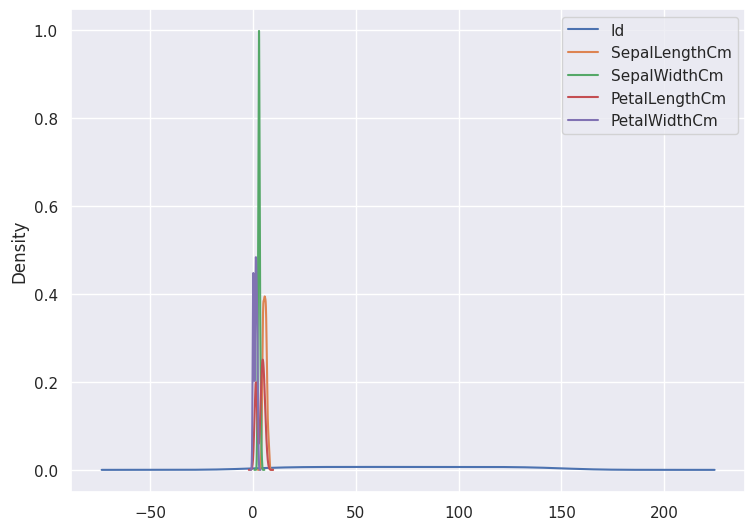

In [55]:
data.plot(kind ='density',subplots = False , layout =(5,3),sharex = True)

Id                  Axes(0.125,0.786098;0.133621x0.0939024)
SepalLengthCm    Axes(0.285345,0.786098;0.133621x0.0939024)
SepalWidthCm      Axes(0.44569,0.786098;0.133621x0.0939024)
PetalLengthCm    Axes(0.606034,0.786098;0.133621x0.0939024)
PetalWidthCm     Axes(0.766379,0.786098;0.133621x0.0939024)
dtype: object

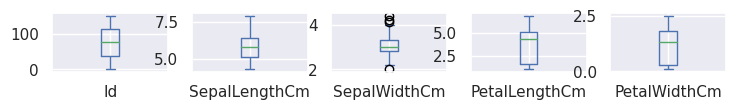

In [58]:
data.plot(kind ='box',subplots = True, layout =(7,5),sharex = False)

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [63]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


Test Train modelling

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 5)
(30, 5)
(120,)
(30,)


In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Create an instance of the Logistic Regression classification model

In [69]:
#using the 'liblinear' optimizer and set C, the Inverse of regularization strength to 0.01
LR = LogisticRegression(C=0.01, solver='liblinear')

#Fit the model with the training data X_train and y_train
LR.fit(X_train,y_train)

#Use the test data X_test to predict the output, yhat_LR
yhat_LR = LR.predict(X_test)

#Use the real values y_test and the predicted values yhat_LR to find the accuracy of the model
print("Accuracy of the SVM Model :", accuracy_score(y_test, yhat_LR))

Accuracy of the SVM Model : 0.8666666666666667


In [70]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [71]:
# Support vector machine algorithm
from sklearn.svm import SVC
data = SVC()
data.fit(X_train, y_train)

SVC()

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [73]:
classifier = KNeighborsClassifier(n_neighbors=6)

In [74]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [83]:
y_pred = classifier.predict(X_test)
x_pred = classifier.predict(X_test)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [77]:
X_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,15,5.8,4.0,1.2,0.2
24,25,4.8,3.4,1.9,0.2
139,140,6.9,3.1,5.4,2.1
58,59,6.6,2.9,4.6,1.3
8,9,4.4,2.9,1.4,0.2
...,...,...,...,...,...
107,108,7.3,2.9,6.3,1.8
21,22,5.1,3.7,1.5,0.4
0,1,5.1,3.5,1.4,0.2
131,132,7.9,3.8,6.4,2.0


In [78]:
y_train

array([0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0,
       2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0,
       1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2,
       0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1,
       1, 0, 1, 2, 2, 2, 0, 0, 2, 2])

In [80]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [82]:
knn.score(X_test, y_test)

1.0

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy: ' + str(round(accuracy, 2)) + '%')

Accuracy: 100.0%
